In [1]:
import numpy as np
from Coursework.ANNModel import model as mod
from Coursework.ANNModel import data as d
from Coursework.PSO import pswarm as ps
from Coursework.PSO import psobehaviour as psh
from Coursework.PSO import history as hs
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

D:\GitProjects\Bio-comp\Coursework\ANNModel\model.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Prepare data and models
### Import and split the data into train and test using sklearn

In [2]:
data = d.Data("./Data/1in_tanh.txt")
X = data.get_rows()
y = data.get_output()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=14)

### Define a model for the tests
#### Also use the PSOFittest class to store the best ANN hyperparameters found in this experiment

In [3]:
model = mod.ANN()
model.set_training_input(X_train, y_train)
#model.add(mod.Layer(1, activation="sigmoid"))
model.add(mod.Layer(4, activation="sigmoid"))
model.add(mod.Layer(1, activation="null"))
model.compile()

model_record = hs.PSOFittest(model)

Model Compiled!


### Instantiate a PSO object that will optimise the ANN model

In [4]:
# create a pso object
inner_pso = ps.PSO(termination_args={'max_iter': 50}, verbose=False, num_runs=10)

#### Configure the inner_pso optimizers search space and fitness function

In [5]:
# Define the search dimensions and fitness function of inner_pso
inner_pso.set_search_dimensions(model_record.dimension_vec())
inner_pso.set_fitness_fn(model_record.evaluate_fitness)

### Instantiate a PSO object that will attempt to optimise the inner_pso object

In [6]:
# Use PSO to optimise the hyperparameters of inner_pso
swarm_size = 10
iterations = 50

meta_pso = ps.PSO(swarm_size=swarm_size, num_informants=6, boundary_policy=psh.BoundaryPolicy.RANDOMREINIT, termination_policy=[psh.TerminationPolicy.ITERATIONS], termination_args={'max_iter': iterations}, alpha=0.61, beta=1.3, gamma=1.4, delta=1.3, epsilon=0.6, verbose=True)

#### Use the PSOHistory class to record each PSO hyperparameter configuration
#### Set the meta_pso optimizers search space and fitness function

In [7]:
pso_record = hs.PSOHistory(inner_pso, swarm_size, iterations)

meta_pso.set_search_dimensions(pso_record.dimension_vec())
meta_pso.set_fitness_fn(pso_record.evaluate_fitness)


## Run experiment
### Start meta_pso
#### Warning this may take at least 30 mins to run.
#### Each iteration each particle of meta_pso will cause inner_pso to run 10 times and return a mean of the resulting runs

In [8]:
# Egregiously inefficient

fitness = meta_pso.run()
print(fitness.location)
print(fitness.fitness)


[9.42453405e+01 4.22304220e+00 7.86130057e-02 1.01586666e+00
 3.70584831e-02 1.21752642e+00 1.57775033e+00]
19.553837446485158


### Best PSO hyperparameters this run

In [9]:

print('Fitness: ', fitness.fitness)
print('Location: ')
fitness.location

Fitness:  19.553837446485158
Location: 


array([9.42453405e+01, 4.22304220e+00, 7.86130057e-02, 1.01586666e+00,
       3.70584831e-02, 1.21752642e+00, 1.57775033e+00])

### Experiment results - best PSO hyperparameters
#### These hyperparameters were found using a neural network with 1 hidden layer with 4 neurons and a single neuron output layer.


In [10]:
# Cubic (10 runs) mean fitness: 44.37869624714425
Cubic_pso_config_mean = [91.38785822,  6.52696304,  0.59416449,  0.43559926,  0.29415449,
        1.29923762,  0.73352514]

# Linear (10 runs) mean fintess: 1103190071387.8752
Linear_pso_config_mean = [85.37707185,  6.86909089,  0.51382895,  0.9798064,  0.12477974, 0.59493009,  0.89702589]

# Tanh (10 runs) mean fitness: 25.520455427936067
Tanh_pso_config_mean = [55.32621771,  7.52578441,  0.12798331,  0.72531664,  1.08313114, 0.29216353,  1.3627685 ]

# Sine (10 runs) mean fitness: 434
Sine_pso_config_mean = [8.73729926e+01, 7.54895398e+00, 7.33998847e-01, 7.52228076e-02,
       2.92737853e-01, 3.09977124e-01, 8.51531051e-01]

# Complex (10 runs) mean fitness: 12
Complex_pso_config_mean = [82.66312781,  5.85540776,  0.62559032,  0.58225519,  0.26541185,
        1.38181036,  0.6510299 ]

# Xor (10 runs) mean fitness: 2710748526
Xor_pso_config_mean = [96.15250011,  7.08445513,  0.53364588,  0.62468836,  1.57375821,
        1.50229261,  0.17895104]


### Experiment results - best ANN hyperparameters
#### These represent the single highest scoring hyperparameters for each dataset from the above experiment

In [11]:
# Cubic Most fit model: 109.50653486975476
Cubic_ann_params = np.array([ 5.3012172 , -0.57272851, -0.29479981,  0.80752501, -0.45059291,
       -0.37421024, -0.75524689, -0.44855557,  0.89593846,  0.21242254,
        0.65222056, -0.53284427, -0.79926862, -0.79949714,  0.96237351])

# Linear Most fit model: 10965948279221.076
Linear_ann_params = np.array([ 0.15520314,  0.2222954 ,  0.47238101, -0.83439247, -0.27726962,
        0.11339216, -0.7816949 , -0.79196132, -0.3392678 ,  0.41548984,
       -0.08055252,  0.12817675, -0.71425698, -0.21576561, -0.7553213 ])

# Tanh Most fit model: 39.38730853575883
Tanh_ann_params = np.array([ 0.09854553,  0.39395654, -0.33737974, -0.12358008,  0.4334227 ,
       -0.98235414, -0.99205521,  0.98638961, -0.97515305,  2.33845816,
        0.51783499, -0.96708832, -0.9922467 ,  0.9696207 , -0.99365926])

# Sine Most fit model: 4212
Sine_ann_params = np.array([ 0.26515734,  0.7400037 , -0.0499965 ,  0.32639921,  0.03951493,
        0.93575309,  0.82658881,  0.95566027,  0.89756768,  3.01482873,
       -0.62419448, -0.9322514 , -0.99330274, -0.85322129, -0.65752741])

# Complex Most fit model: 15.36
Complex_ann_params = np.array([ 5.16794124, -0.50701965, -0.02085653, -0.67915966, -0.56917589,
        0.93068562,  0.25302176,  0.92653444,  0.67209426,  0.39299595,
       -0.75832145, -0.44806736, -0.62409455,  2.26094952, -0.26506833,
       -0.86461154,  0.31096583,  0.90781783,  0.72454439])

# Xor Most fit model: 27107485189
Xor_ann_params = np.array([-0.13057076, -0.66250843,  0.0122888 , -0.4294471 , -0.56088656,
        0.76634383,  0.95302873,  0.27348615,  0.86272884,  0.79509781,
        0.80510636,  0.08453014,  0.86190117,  3.37130705, -0.79043449,
        0.74686407,  0.4886179 , -0.22842822,  0.69471657])

### Best ANN hyperparameter found this run

In [12]:
print('Fitness: ', model_record.fitness)
print('Location: ')
model_record.vec

Fitness:  33.383213782186225
Location: 


array([ 0.16661778,  0.49608754, -0.09051518,  0.30708833,  0.21145152,
       -0.88250885, -0.97575555,  0.87148693,  0.9950568 ,  2.22244072,
       -0.12292959, -0.96828769, -0.93457293,  0.9789904 ,  0.98088047])

## Visualise the data
#### First move the history vectors into a dictionary where each key is a particle

In [13]:
particle_fitness_dict = pso_record.historical_particle_fitness()
particle_location_dict = pso_record.historical_particle_location()

#### Compute the nth iteration each particle found its personal best

In [14]:
#pso_record.best_iter_per_particle()

### Plot particle fitness over iterations
#### Iteration numnber on the x-axis and the fitness score on the y-axis

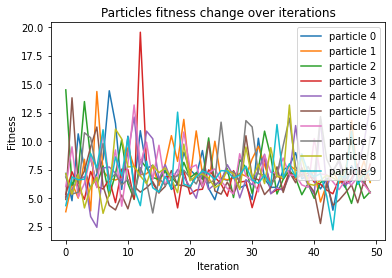

In [15]:
pso_record.plot_fitness()

### Plot mean fitness of all paticles
#### Helps to visualise an overall trend across iterations.

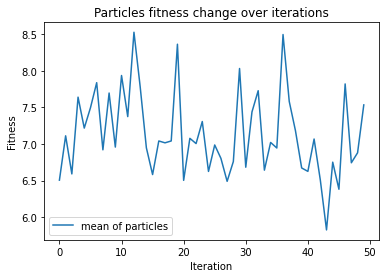

In [16]:
pso_record.plot_mean_fitness()